In [ ]:
import numpy as np

In [53]:
from matplotlib import cm

import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
%matplotlib inline

In [ ]:
# Set spatial parameters.
Lx, Ly = 5.0, 5.0 # domain dimensions
nx, ny = 192, 192 # number of points in each direction
dx, dy = Lx / (nx - 1), Ly / (ny - 1) # grid spacings

# Set parameters of the pattern.
Du, Dv = 0.00016, 0.00008  # rates of diffusion
F, k = 0.035, 0.065  # parameters to feed and kill

# Set temporal parameters.
t = 8000.0  # final time
dt = 9.0 * dx**2 / (40.0 * max(Du, Dv))  # time-step size
nt = int(t / dt)  # number of time steps to compute

In [ ]:
import urllib.request

# Download and read the data file.
url = ('https://github.com/numerical-mooc/numerical-mooc/blob/master/'
       'lessons/04_spreadout/data/uvinitial.npz?raw=true')
filepath = 'uvinitial.npz'
urllib.request.urlretrieve(url, filepath);

In [86]:
# Read the initial fields from the file.
#uvinitial = np.load('./uvinitial.npz')
uvinitial = np.load(filepath)
u0, v0 = uvinitial['U'], uvinitial['V']



In [85]:
def ftcs(u0, v0, nt, dt, dx, Du, Dv, F, k):


    # Integrate in time.
    sigma = dt / dx**2
    U = u0.copy()
    V = v0.copy()
#    ims = []
    for n in range(nt):
        U[1:-1, 1:-1] = (U[1:-1, 1:-1] + Du * sigma * (U[1:-1, 2:] - 2.0 * U[1:-1, 1:-1] + U[1:-1, :-2] 
                        + U[2:, 1:-1] - 2.0 * U[1:-1, 1:-1] + U[:-2, 1:-1])
                        - dt * U[1:-1, 1:-1] * V[1:-1, 1:-1]**2 + dt * F * (1 - U[1:-1, 1:-1]))
        V[1:-1, 1:-1] = (V[1:-1, 1:-1] + Dv * sigma * (V[1:-1, 2:] - 2.0 * V[1:-1, 1:-1] + V[1:-1, :-2] 
                        + V[2:, 1:-1] - 2.0 * V[1:-1, 1:-1] + V[:-2, 1:-1]) 
                        + dt * U[1:-1, 1:-1] * V[1:-1, 1:-1]**2 - dt * (F + k) * V[1:-1, 1:-1])
        # Apply BCs.
        U[-1, :] = U[-2, :]
        U[:, -1] = U[:, -2]
        U[0, :] = U[1, :]
        U[:, 0] = U[:, 1]
        V[-1, :] = V[-2, :]
        V[:, -1] = V[:, -2]
        V[0, :] = V[1, :]
        V[:, 0] = V[:, 1]

#        im = plt.imshow(U, animated=True)
#    ims.append([im])
    return U, V

In [ ]:
u0

array([[1.03341932, 1.00909902, 1.03523907, ..., 1.01236   , 1.02769296,
        1.01185515],
       [1.02049366, 1.03874603, 1.03186003, ..., 1.00917594, 1.00648275,
        1.01929723],
       [1.0297385 , 1.02874589, 1.02488765, ..., 1.0345737 , 1.00195443,
        1.03189674],
       ...,
       [1.03851006, 1.01833226, 1.00260628, ..., 1.00514165, 1.04292736,
        1.0090857 ],
       [1.03951143, 1.0425582 , 1.03609776, ..., 1.00643229, 1.04094253,
        1.03869138],
       [1.01132752, 1.00554757, 1.00241105, ..., 1.04435044, 1.02683595,
        1.01239924]])

In [90]:
#Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral
#Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint
#Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050 # Spirals
#Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
#Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050 # Spirals Fast
#Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable
#Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065 # Worms 1
Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063 # Worms 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish

In [91]:
U, V = ftcs(u0, v0, nt, dt, dx, Du, Dv, F, k)

In [92]:
U[100,::40]

array([0.43144095, 0.66142651, 0.67942465, 0.48410366, 0.50618494])

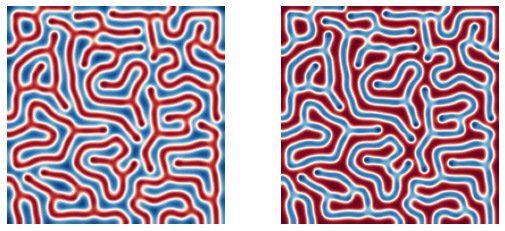

In [93]:
# Plot the initial fields.
fig, ax = pyplot.subplots(ncols=2, figsize=(9.0, 4.0))
ax[0].imshow(U, cmap=cm.RdBu)
ax[0].axis('off')
ax[1].imshow(V, cmap=cm.RdBu)
ax[1].axis('off');